# Estimating Stellar Mass-to-Light Ratios using Colours

Based on the work by [Taylor et al. (2011)](https://academic.oup.com/mnras/article/418/3/1587/1060932) and maybe [Gallazzi & Bell (2009)](https://iopscience.iop.org/article/10.1088/0067-0049/185/2/253)


In [1]:
# May need to do this if running remote server with VS Code
%cd "/arc/home/IsaacCheng/coop_f2021/warmup"

/arc/home/IsaacCheng/coop_f2021/warmup


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
import astropy.units as u
import fits_plot_utils as utils
import dill
from scipy.optimize import curve_fit
from astropy.wcs.utils import proj_plane_pixel_scales, skycoord_to_pixel

# Load and mask data


In [7]:
# # 
# # Load data
# # 
# vcc792_dist = 16.5 * u.Mpc
# # Signal
# zband_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.z.Mg004.3136_8588_6905_10184.fits"
# iband_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.i.Mg004.3136_8588_6905_10184.fits"
# gband_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.g.Mg004.3136_8588_6905_10184.fits"
# uband_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.u.Mg004.3136_8588_6905_10184.fits"
# # Noise (sigma maps)
# znoise_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.z.Mg004.sig.3136_8588_6905_10184.fits"
# inoise_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.i.Mg004.sig.3136_8588_6905_10184.fits"
# gnoise_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.g.Mg004.sig.3136_8588_6905_10184.fits"
# unoise_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.u.Mg004.sig.3136_8588_6905_10184.fits"
# # Mask (flap maps)
# zgood_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.z.Mg004.flag.3136_8588_6905_10184.fits"
# igood_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.i.Mg004.flag.3136_8588_6905_10184.fits"
# ggood_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.g.Mg004.flag.3136_8588_6905_10184.fits"
# ugood_path = "/arc/home/IsaacCheng/coop_f2021/ngvs_data/NGVS-2-2.l.u.Mg004.flag.3136_8588_6905_10184.fits"
# # 
# # Load NGVS data
# # 
# # Signal
# data_z, header_z = utils.load_img(zband_path)
# data_i, header_i = utils.load_img(iband_path)
# data_g, header_g = utils.load_img(gband_path)
# data_u, header_u = utils.load_img(uband_path)
# # Noise
# noise_z, header_noise_z = utils.load_img(znoise_path)
# noise_i, header_noise_i = utils.load_img(inoise_path)
# noise_g, header_noise_g = utils.load_img(gnoise_path)
# noise_u, header_noise_u = utils.load_img(unoise_path)
# # Masks
# good_z, header_good_z = utils.load_img(zgood_path, idx=1)
# good_i, header_good_i = utils.load_img(igood_path, idx=1)
# good_g, header_good_g = utils.load_img(ggood_path, idx=1)
# good_u, header_good_u = utils.load_img(ugood_path, idx=1)
# # 
# # VERTICO CO Data
# # 
# # co_path = "/arc/projects/vertico/products/release.v1.2/native/NGC4380/NGC4380_7m+tp_co21_pbcorr_round_k_mom0_Msun.fits"
# co_path = "/arc/projects/vertico/products/release.v1.2/nyquistPix/9arcsec/NGC4380/NGC4380_7m+tp_co21_pbcorr_round_k_nyquistPix_9_arcsec_mom0_Msun.fits"
# data_co, header_co = utils.load_img(co_path)
# wcs_co = WCS(header_co)
# #
# # Mask the data and noise arrays
# #
# data_u_masked = np.ma.masked_array(data_u, mask=good_u == 0).filled(fill_value=np.nan)
# noise_u_masked = np.ma.masked_array(noise_u, mask=good_u == 0).filled(fill_value=np.nan)
# data_g_masked = np.ma.masked_array(data_g, mask=good_g == 0).filled(fill_value=np.nan)
# noise_g_masked = np.ma.masked_array(noise_g, mask=good_g == 0).filled(fill_value=np.nan)
# data_i_masked = np.ma.masked_array(data_i, mask=good_i == 0).filled(fill_value=np.nan)
# noise_i_masked = np.ma.masked_array(noise_i, mask=good_i == 0).filled(fill_value=np.nan)
# data_z_masked = np.ma.masked_array(data_z, mask=good_z == 0).filled(fill_value=np.nan)
# noise_z_masked = np.ma.masked_array(noise_z, mask=good_z == 0).filled(fill_value=np.nan)

In [81]:
# 
# Load binned data from pickle file
# 
g_infile = "/arc/home/IsaacCheng/coop_f2021/binned_data/NGVS-2-2.l.g.Mg004.3136_8588_6905_10184_BINNED_MAGS_reproject_exact+masked_star.pkl"
with open(g_infile, "rb") as f:
    g_file = dill.load(f)
    vcc792_dist_pc = g_file["dist_pc"]
    vcc792_dist_err_pc = g_file["dist_pc_err"]
    g_xs = g_file["x_coords"]
    g_ys = g_file["y_coords"]
    g_signal = g_file["signal_binned"]
    g_noise = g_file["noise_binned"]
    g_abs_mag = g_file["abs_mag"]
    g_abs_mag_err = g_file["abs_mag_err"]
    g_isgood = g_file["is_good"]
    g_wcs = g_file["wcs_binned"]
    g_wcs.array_shape = g_file["wcs_binned_array_shape"]
# 
i_infile = "/arc/home/IsaacCheng/coop_f2021/binned_data/NGVS-2-2.l.i.Mg004.3136_8588_6905_10184_BINNED_MAGS_reproject_exact+masked_star.pkl"
with open(i_infile, "rb") as f:
    i_file = dill.load(f)
    i_xs = i_file["x_coords"]
    i_ys = i_file["y_coords"]
    i_signal = i_file["signal_binned"]
    i_noise = i_file["noise_binned"]
    i_abs_mag = i_file["abs_mag"]
    i_abs_mag_err = i_file["abs_mag_err"]
    i_isgood = i_file["is_good"]
    i_wcs = i_file["wcs_binned"]
    i_wcs.array_shape = i_file["wcs_binned_array_shape"]
# 
# Load CO map data
# 
co_path = "/arc/projects/vertico/products/release.v1.2/nyquistPix/9arcsec/NGC4380/NGC4380_7m+tp_co21_pbcorr_round_k_nyquistPix_9_arcsec_mom0_Msun.fits"
data_co, header_co = utils.load_img(co_path)
wcs_co = WCS(header_co)

Filename: /arc/projects/vertico/products/release.v1.2/nyquistPix/9arcsec/NGC4380/NGC4380_7m+tp_co21_pbcorr_round_k_nyquistPix_9_arcsec_mom0_Msun.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   (42, 42)   float64   


In [138]:
gi_signal = -2.5 * np.log10(g_signal / i_signal)  # g- & i-values from binned data
gi_noise = utils.calc_colour_err(g_signal, i_signal, g_noise, i_noise)
# 
def calc_pixel_size(imgwcs, dist, dist_err=None):
    """
    Calculates the physical size of each pixel in parsecs per pixel dimension.
    
    Parameters:
      imgwcs :: `astropy.wcs.wcs.WCS`
        The WCS coordinates of the .fits file
      dist :: `astropy.units.quantity.Quantity` scalar 
        The distance to the object
      dist_err :: `astropy.units.quantity.Quantity` scalar (optional, default: None)
        The uncertainty in the distance to the object

    Returns: pc_per_px, pc_per_px_err
      pc_per_px :: some astropy quantity
        The spatial resolution of the image in parsecs per pixel (along each axis)
      pc_per_px_err :: some astropy quantity
        The uncertainty in the spatial resolution of the image (along each axis)
    """
    arcsec_per_px = (proj_plane_pixel_scales(imgwcs.celestial) * u.deg).to(u.arcsec)
    # Still deciding whether to use arctan for the next line
    arcsec_per_pc = np.rad2deg(1 * u.pc / dist.to(u.pc) * u.rad).to(u.arcsec)
    pc_per_px = arcsec_per_px / arcsec_per_pc
    # 
    if dist_err is not None:
        # arcsec_per_pc_err = np.rad2deg(1 * u.pc / dist_err.to(u.pc) * u.rad).to(u.arcsec)
        # pc_per_px_err = arcsec_per_px / arcsec_per_pc_err
        # Uncertainty transforms linearly
        pc_per_px_err = pc_per_px * dist_err.to(u.pc) / dist.to(u.pc)
        return pc_per_px, pc_per_px_err
    return pc_per_px, None
#
# Get absolute magnitudes in i-band
#
abs_mag_i, abs_mag_i_err = utils.calc_mag(
    i_signal,
    i_noise,
    zpt=30,
    calc_abs=True,
    dist=vcc792_dist_pc,
    dist_err=vcc792_dist_err_pc,
)
# abs_mag_i = rel_mag_i - 5 * (np.log10(vcc792_dist_pc) - 1)
abs_mag_i_sun = 4.58  # absolute AB magnitude of Sun in i-band
#
# Eq. (7) of Taylor et al. (2011)
#
log_MLi = -0.68 + 0.70 * gi_signal  # log10 of mass-to-light ratio in i-band
log_MLi_err = 0.7 * gi_noise  # uncertainty in log10 of mass-to-light ratio
MLi = 10 ** log_MLi  # mass-to-light ratio in i-band
MLi_err = np.log(10) * abs(MLi * log_MLi_err)  # uncertainty in mass-to-light ratio
#
# Get masses in solar units
#
Li = 10 ** (-0.4 * (abs_mag_i - abs_mag_i_sun))  # luminosity in i-band
Li_err = abs(
    Li * np.log(10) * 0.4 * abs_mag_i_err
)  # uncertainty in luminosity, assuming no error in abs_mag_i_sun
M = MLi * Li  # masses in solar units
M_err = np.sqrt((MLi_err / MLi) ** 2 + (Li_err / Li) ** 2) * M  # uncertainty in masses
# 
# Get mass densities
# 
i_pc_per_px, i_pc_per_px_err = calc_pixel_size(i_wcs, vcc792_dist_pc * u.pc, vcc792_dist_err_pc * u.pc)
print(i_pc_per_px, i_pc_per_px_err)
px_area = i_pc_per_px[0] * i_pc_per_px[1]  # pixel area in pc^2
px_area_err = (
    np.sqrt(
        (i_pc_per_px_err[0] / i_pc_per_px[0]) ** 2
        + (i_pc_per_px_err[1] / i_pc_per_px[1]) ** 2
    )
    * px_area
)  # uncertainty in pixel area
print(px_area, px_area_err, px_area_err / px_area)
M_density = M / px_area  # stellar mass density in solar units per parsec^2
M_density_err = np.sqrt((M_err / M) ** 2 + (px_area_err / px_area) ** 2) * M_density
#
# Save to file
#
Li_outfile = "/arc/home/IsaacCheng/coop_f2021/binned_data/vcc792_MLi_BINNED_reproject_exact+masked_star.txt"
id_arr = np.array(
    [str(x).zfill(2) + str(y).zfill(2) for x, y in zip(g_xs.flatten(), g_ys.flatten())]
)
Li_outdata = pd.DataFrame(
    {
        "id": id_arr,
        "M": M.flatten(),
        "M_err": M_err.flatten(),
        "Li": Li.flatten(),
        "Li_err": Li_err.flatten(),
        "MLi": MLi.flatten(),
        "MLi_err": MLi_err.flatten(),
        "M_density": M_density.flatten(),
        "M_density_err": M_density_err.flatten(),
    }
)
Li_outdata.to_csv(Li_outfile, sep=" ", index=False, header=True)
#
# Calculating masses using Eq. (8) of Taylor et al. (2011)
#
# M2 = 10 ** (1.15 + 0.7 * gi_signal - 0.4 * abs_mag_i)
# print(M)
# print(M2)


[446.02858662 446.02858662] [44.60285866 44.60285866]
198941.5000828847 28134.576753606376 0.1414213562373095


In [115]:
%matplotlib widget
plt.close("all")
# 
# Plot mass map
# 
cmap = "viridis"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5), subplot_kw={"projection": i_wcs})
img1 = ax1.imshow(M, cmap=cmap, norm=LogNorm(vmin=2e6, vmax=1e8))
# img = ax1.imshow(M, cmap=cmap, vmin=1e6, vmax=3e7)
# img = ax1.imshow(M, cmap=cmap, vmin=1e6, vmax=5e7)
cbar1 = fig.colorbar(img1, ax=ax1, fraction=0.046)
cbar1.ax.tick_params(which="both", direction="out")
cbar1.set_label(r"Stellar Mass ($M_*/M_\odot$)")
cbar1.ax.yaxis.set_offset_position("left")
ax1.contour(
    data_co,
    transform=ax1.get_transform(WCS(header_co)),
    levels=range(0, 15, 5),
    colors="w"
)
ax1.set_title("Stellar Mass Map Estimate")
ax1.set_xlabel("RA (J2000)")
ax1.set_ylabel("Dec (J2000)")
ax1.grid(False)
ax1.set_aspect("equal")
# 
img2 = ax2.imshow(MLi, cmap=cmap, vmax=1.5)
cbar2 = fig.colorbar(img2, ax=ax2, fraction=0.046)
cbar2.ax.tick_params(which="both", direction="out")
cbar2.set_label(r"Mass-to-Light Ratio")
cbar2.ax.yaxis.set_offset_position("left")
ax2.contour(
    data_co,
    transform=ax2.get_transform(WCS(header_co)),
    levels=range(0, 15, 5),
    colors="w"
)
ax2.set_title("Mass-to-Light Ratio Estimate")
ax2.set_xlabel("RA (J2000)")
ax2.set_ylabel("Dec (J2000)")
ax2.grid(False)
ax2.set_aspect("equal")
# 
fig.tight_layout(pad=5)
fig.suptitle("VCC 792 / NGC 4380")
# fig.savefig("imgs/vcc792_i-mass_estimate+ML_ratio+masked_star.pdf")
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0.06275764 6.61632243] [0.05034127 0.36156839]
R^2: 0.375125400264835


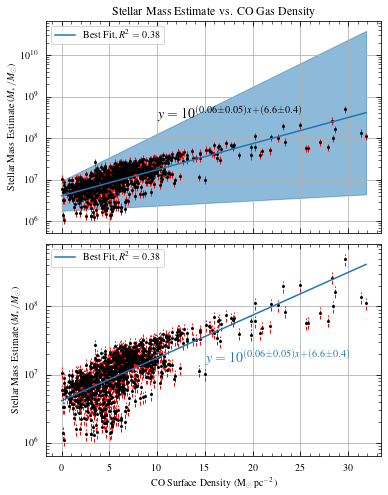

In [153]:
%matplotlib inline
plt.close("all")
#
# Plot stellar mass vs CO density
#
def line(x, m, b):
    return m * x + b
#
# Nonlinear least squares regression
#
popt, pcov = curve_fit(
    line,
    data_co[data_co > 0],
    np.log10(M[data_co > 0]),
    sigma=np.log10(M_err[data_co > 0]),
    absolute_sigma=True,
)
pstd = np.sqrt(np.diag(pcov))
xvals = np.linspace(0, np.max(data_co), 100)
print(popt, pstd)
# 
# Calculate coefficient of determination
# 
sum_sq_res = np.sum((10 ** line(data_co[data_co > 0], *popt) - M[data_co > 0]) ** 2)
tot_sum_sq = np.sum((M[data_co > 0] - np.mean(M[data_co > 0])) ** 2)
r_sq = 1 - sum_sq_res / tot_sum_sq
print("R^2:", r_sq)
#
# Plot
#
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)
ebar1 = ax1.errorbar(
    x=data_co[data_co > 0],
    y=M[data_co > 0],
    yerr=M_err[data_co > 0],
    fmt=".",
    markersize=4,
    color="k",
    ecolor="r",
    elinewidth=1,
)
ebar1[-1][0].set_linestyle("--")
ax1.plot(xvals, 10 ** line(xvals, *popt), c="tab:blue", label=f"Best Fit, $R^2={r_sq:.2f}$", zorder=10)
ax1.fill_between(
    xvals,
    10 ** line(xvals, *(popt - pstd)),
    10 ** line(xvals, *(popt + pstd)),
    alpha=0.5,
    color="tab:blue",
)
ax1.text(
    10,
    3e8,
    f"$y=10^{{({popt[0]:.2f} \\pm {pstd[0]:.2f})x + ({popt[1]:.1f} \\pm {pstd[1]:.1f})}}$",
    color="k",
    fontsize=14,
)
ax1.set_yscale("log")
ax1.set_ylabel(r"Stellar Mass Estimate ($M_*/M_\odot$)")
ax1.set_title("Stellar Mass Estimate vs. CO Gas Density")
ax1.legend(loc="upper left")
# Plot without shaded errors
ebar2 = ax2.errorbar(
    x=data_co[data_co > 0],
    y=M[data_co > 0],
    yerr=M_err[data_co > 0],
    fmt=".",
    markersize=4,
    color="k",
    ecolor="r",
    elinewidth=1,
)
ebar2[-1][0].set_linestyle("--")
ax2.plot(xvals, 10 ** line(xvals, *popt), c="tab:blue", label=f"Best Fit, $R^2={r_sq:.2f}$", zorder=10)
ax2.text(
    15,
    1.5e7,
    f"$y=10^{{({popt[0]:.2f} \\pm {pstd[0]:.2f})x + ({popt[1]:.1f} \\pm {pstd[1]:.1f})}}$",
    color="tab:blue",
    fontsize=14,
)
ax2.set_yscale("log")
ax2.set_xlabel(r"CO Surface Density ($\rm M_\odot\; pc^{-2}$)")
ax2.set_ylabel(r"Stellar Mass Estimate ($M_*/M_\odot$)")
# ax2.set_title("Stellar Mass Estimate vs. CO Gas Density")
ax2.legend(loc="upper left")
plt.subplots_adjust(hspace=0.05)
# fig.savefig("imgs/vcc792_i-mass_vs_CO.pdf")
plt.show()

[0.06107229 1.34743336] [0.00178798 0.01361302]
R^2: 0.42774158450483724


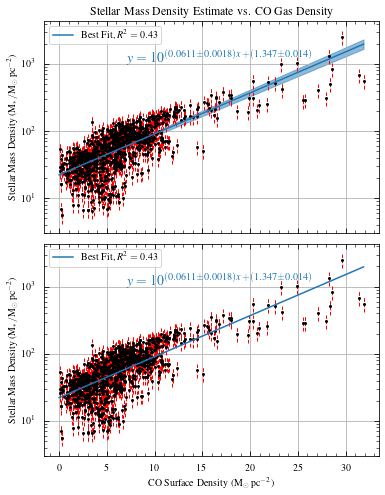

In [155]:
%matplotlib inline
plt.close("all")
#
# Plot stellar mass density vs CO density
#
def line(x, m, b):
    return m * x + b
#
# Nonlinear least squares regression
#
popt, pcov = curve_fit(
    line,
    data_co[data_co > 0],
    np.log10(M_density[data_co > 0]),
    # sigma=np.log10(M_density_err[data_co > 0]),
    # absolute_sigma=True,
)
pstd = np.sqrt(np.diag(pcov))
xvals = np.linspace(0, np.max(data_co), 100)
print(popt, pstd)
# 
# Calculate coefficient of determination
# 
sum_sq_res = np.sum((10 ** line(data_co[data_co > 0], *popt) - M_density[data_co > 0]) ** 2)
tot_sum_sq = np.sum((M_density[data_co > 0] - np.mean(M_density[data_co > 0])) ** 2)
r_sq = 1 - sum_sq_res / tot_sum_sq
print("R^2:", r_sq)
#
# Plot
#
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)
ebar1 = ax1.errorbar(
    x=data_co[data_co > 0],
    y=M_density[data_co > 0],
    yerr=M_density_err[data_co > 0],
    fmt=".",
    markersize=4,
    color="k",
    ecolor="r",
    elinewidth=1,
)
ebar1[-1][0].set_linestyle("--")
ax1.plot(xvals, 10 ** line(xvals, *popt), c="tab:blue", label=f"Best Fit, $R^2={r_sq:.2f}$", zorder=10)
ax1.fill_between(
    xvals,
    10 ** line(xvals, *(popt - pstd)),
    10 ** line(xvals, *(popt + pstd)),
    alpha=0.5,
    color="tab:blue",
)
ax1.text(
    7,
    1.05e3,
    f"$y=10^{{({popt[0]:.4f} \\pm {pstd[0]:.4f})x + ({popt[1]:.3f} \\pm {pstd[1]:.3f})}}$",
    color="tab:blue",
    fontsize=14,
)
ax1.set_yscale("log")
ax1.set_ylabel(r"Stellar Mass Density ($\rm M_*/M_\odot\; pc^{-2}$)")
ax1.set_title("Stellar Mass Density Estimate vs. CO Gas Density")
ax1.legend(loc="upper left")
# Plot without shaded errors
ebar2 = ax2.errorbar(
    x=data_co[data_co > 0],
    y=M_density[data_co > 0],
    yerr=M_density_err[data_co > 0],
    fmt=".",
    markersize=4,
    color="k",
    ecolor="r",
    elinewidth=1,
)
ebar2[-1][0].set_linestyle("--")
ax2.plot(xvals, 10 ** line(xvals, *popt), c="tab:blue", label=f"Best Fit, $R^2={r_sq:.2f}$", zorder=10)
ax2.text(
    7,
    1.05e3,
    f"$y=10^{{({popt[0]:.4f} \\pm {pstd[0]:.4f})x + ({popt[1]:.3f} \\pm {pstd[1]:.3f})}}$",
    color="tab:blue",
    fontsize=14,
)
ax2.set_yscale("log")
ax2.set_xlabel(r"CO Surface Density ($\rm M_\odot\; pc^{-2}$)")
ax2.set_ylabel(r"Stellar Mass Density ($\rm M_*/M_\odot\; pc^{-2}$)")
# ax2.set_title("Stellar Mass Estimate vs. CO Gas Density")
ax2.legend(loc="upper left")
plt.subplots_adjust(hspace=0.05)
# fig.savefig("imgs/vcc792_i-mass_density_vs_CO.pdf")
plt.show()